Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright obj

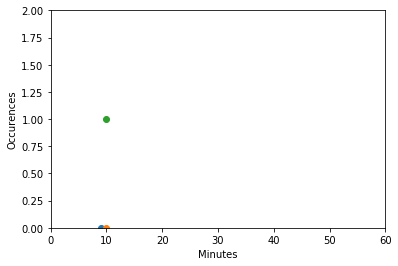

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:01.719966. Last clouds reported at Thu Aug 10 10:10:00 2017.
10


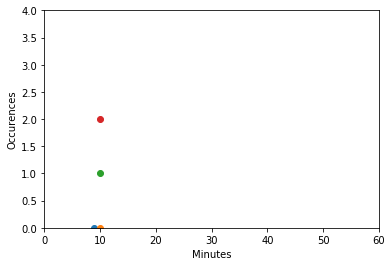

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:02.499508. Last clouds reported at Thu Aug 10 10:10:01 2017.
10


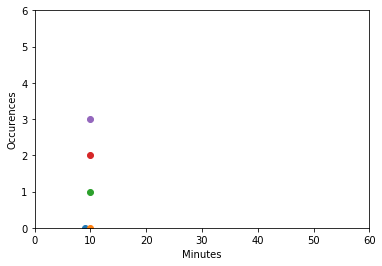

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:03.161682. Last clouds reported at Thu Aug 10 10:10:02 2017.
10


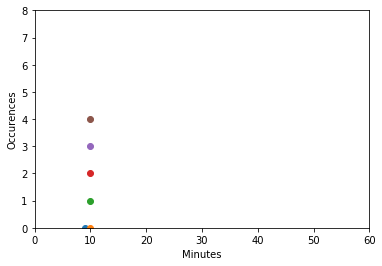

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:03.853538. Last clouds reported at Thu Aug 10 10:10:03 2017.
10


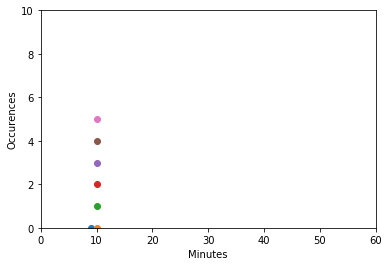

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:04.534723. Last clouds reported at Thu Aug 10 10:10:03 2017.
10


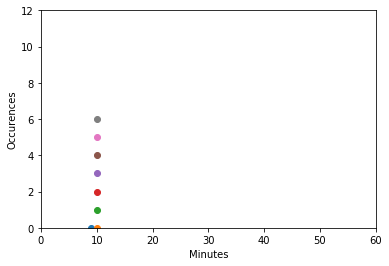

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:05.384189. Last clouds reported at Thu Aug 10 10:10:04 2017.
10


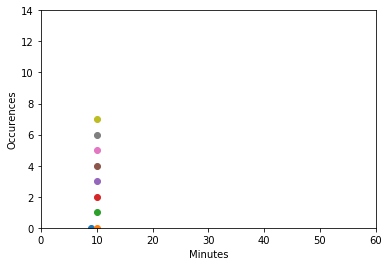

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:06.128768. Last clouds reported at Thu Aug 10 10:10:05 2017.
10


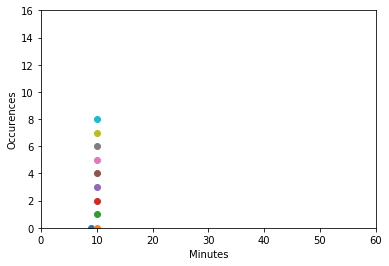

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:06.874802. Last clouds reported at Thu Aug 10 10:10:06 2017.
10


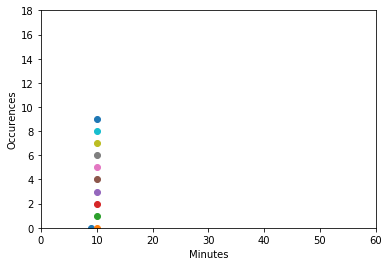

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:07.653410. Last clouds reported at Thu Aug 10 10:10:06 2017.
10


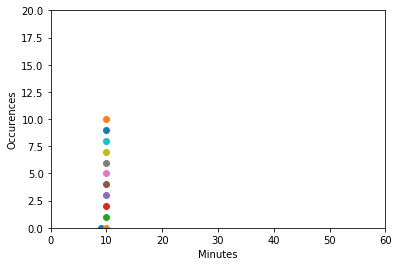

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:08.626870. Last clouds reported at Thu Aug 10 10:10:07 2017.
10


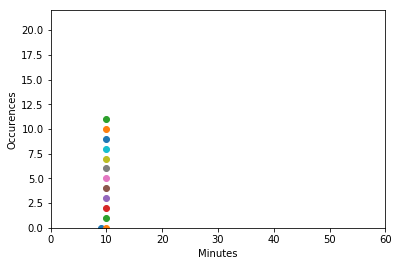

Using matplotlib backend: MacOSX
It is cloudy today. Expect some variance in data results. The time is currently 10:10:09.472494. Last clouds reported at Thu Aug 10 10:10:08 2017.
10


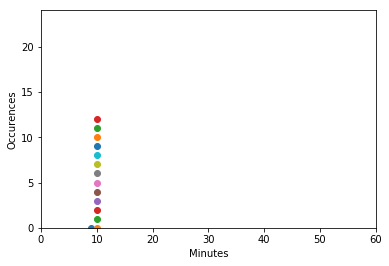

Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Bright object detected!
Using matplotlib backend: MacOSX
Bright object detected!
Bright object detected!
B

In [1]:
#%%javascript console.log("Written by Danial && Harris")
import cv2
import datetime
import numpy as np
from matplotlib import pyplot as plt
import time
i = 0
ival = 0
j = datetime.datetime.now().minute
cap = cv2.VideoCapture(0)
now = ""
width = 16
height = 9
minutes = int(time.strftime("%m"))
 
nows = time.strftime("%s")
plt.figure(figsize=(width, height))
while True:
    flag, frame = cap.read()
 
    if flag == 0:
        break
    (h, s, v) = cv2.split(frame)
    s = s + 3;
    s = np.clip(s,0,255)
    frame = cv2.merge([h,s,v])
    shadowc = cv2.cvtColor(frame, cv2.COLOR_RGB2RGBA)
    edges = cv2.Canny(shadowc,100,200)
    cv2.imshow("Frame", frame)
    cv2.imshow("Edges", edges)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    diff = 7
    w1 = np.array([0,0,255-diff])
    w2 = np.array([255,diff,255])
    mask = cv2.inRange(hsv, w1, w2)
    # Cloudy day detector
    sens = -1
    if np.any(frame[100, 100] < [100, 100, 100]):
        nowm = datetime.datetime.now().minute
        if (nowm != minutes):
            ival = i
            j = j + 1
            i = 0
       
        i = i + 1
        
        print("It is cloudy today. Expect some variance in data results. The time is currently %s. Last clouds reported at %s." % ((str(datetime.datetime.now().time())), str(now)))  
        now = time.strftime("%c")
        nows = time.strftime("%s")
        %matplotlib inline
        for x in range(0, ival+1):
            plt.scatter(j-1,x)
        for x in range(0, i+1):
            plt.scatter(j,x)
            
        minutes = datetime.datetime.now().minute
        print minutes
        plt.axis([0, 60, 0, i*2])
        plt.xlabel('Minutes')
        plt.ylabel('Occurences')
        plt.show()
        res = cv2.bitwise_and(frame,frame, mask= mask)
            
    while (sens < 4):
        sens = sens + 1
        if np.any(frame[100,100] >= [255-sens, 69-sens, 247-sens]):
                print("Bright object detected!")
    %matplotlib  
   
    plt.subplot(122),plt.imshow(edges,cmap = 'gray', alpha = 0.5)
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([]),    
    plt.imshow(frame,zorder=1, alpha=1.0)
    plt.show()
    # Quit key is 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
            plt.close()
            break
       
cap.release()
cv2.destroyAllWindows()